# Crime Trail Blazers

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Name of the CSV file
file15 = 'Resources/2015_Portland_Crime_Data.csv'
file16 = 'Resources/2016_Portland_Crime_Data.csv'
file17 = 'Resources/2017_Portland_Crime_Data.csv'
file18 = 'Resources/2018_Portland_Crime_Data.csv'
nba_data ='Resources/portland.games.stats.csv'

In [3]:
# The correct encoding must be used to read the CSV in pandas
df_2015 = pd.read_csv(file15, encoding="ISO-8859-1")
df_2016 = pd.read_csv(file16, encoding="ISO-8859-1")
df_2017 = pd.read_csv(file17, encoding="ISO-8859-1")
df_2018 = pd.read_csv(file18, encoding="ISO-8859-1")
nba_data = pd.read_csv(nba_data, encoding="ISO-8859-1")

## Portland Trailblazers Stats 2015-19

In [4]:
nba_data.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1108,POR,1,10/29/2014,Home,OKC,W,106,89,39,...,21,26,0.808,14,43,19,9,5,13,28
1,2108,POR,2,10/31/2014,Away,SAC,L,94,103,34,...,31,35,0.886,14,49,14,6,2,10,24
2,3108,POR,3,11/2/2014,Home,GSW,L,90,95,37,...,17,21,0.810,7,41,22,11,7,17,16
3,4108,POR,4,11/4/2014,Home,CLE,W,101,82,37,...,11,14,0.786,13,41,18,5,3,14,19
4,5108,POR,5,11/6/2014,Home,DAL,W,108,87,40,...,16,16,1.000,8,34,14,6,4,7,17


In [5]:
# add Day of Week
nba_data['dow']= pd.to_datetime(nba_data['Date']).dt.dayofweek

In [6]:
# Change date format and reduce dates to 2015 - 2018
nba_data['Date'] = pd.to_datetime(nba_data['Date'])
start_date = '01/01/2015'
end_date = '12/31/2018'
mask = (nba_data['Date'] >= start_date) & (nba_data['Date'] <= end_date)
nba_data = nba_data.loc[mask]

In [7]:
# Created a new dataframe using the data_df to display columns these columns:
new_nba_df = nba_data[['Date','Team','Game','Home','WINorLOSS', 'dow']] 
new_nba_df.head()

,Date,Team,Game,Home,WINorLOSS,dow
33,2015-01-03,POR,34,Home,L,5
34,2015-01-05,POR,35,Home,W,0
35,2015-01-08,POR,36,Home,W,3
36,2015-01-10,POR,37,Home,W,5
37,2015-01-11,POR,38,Away,W,6


## Crime Data

In [8]:
# Concatinate all crime data
concat_crime_df = pd.concat([df_2015, df_2016, df_2017, df_2018])
concat_crime_df.head()

,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount
0,NaN,15-X197430,Person,Piedmont,5/12/2015,1400,Assault Offenses,Intimidation,NaN,NaN,NaN,NaN,5/12/2015,1
1,NaN,15-X4282999,Person,Buckman West,5/1/2015,2143,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,5/1/2015,1
2,NaN,15-X4283033,Person,University Park,5/1/2015,1625,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,5/1/2015,1
3,NaN,15-X4283218,Person,Madison South,5/1/2015,1820,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,5/1/2015,1
4,NaN,15-X4283218,Person,Madison South,5/1/2015,1820,Kidnapping/Abduction,Kidnapping/Abduction,NaN,NaN,NaN,NaN,5/1/2015,1


In [9]:
# add Day of Week
concat_crime_df['dow']= pd.to_datetime(concat_crime_df['OccurDate']).dt.dayofweek

In [10]:
# Created a new dataframe using the data_df to display columns these columns:
new_crime_df = concat_crime_df[['OccurDate','Neighborhood','OffenseType','dow']]

In [11]:
# Rename date field
new_crime_df = new_crime_df.rename(columns={"OccurDate":"Date"})
new_crime_df.head()

,Date,Neighborhood,OffenseType,dow
0,5/12/2015,Piedmont,Intimidation,1
1,5/1/2015,Buckman West,Simple Assault,4
2,5/1/2015,University Park,Simple Assault,4
3,5/1/2015,Madison South,Simple Assault,4
4,5/1/2015,Madison South,Kidnapping/Abduction,4


In [13]:
# Filter out reports of crimes prior to 2015
new_crime_df['Date'] = pd.to_datetime(new_crime_df['Date'])
start_date = '01/01/2015'
end_date = '12/31/2018'
mask = (new_crime_df['Date'] >= start_date) & (new_crime_df['Date'] <= end_date)
new_crime_df = new_crime_df.loc[mask]
new_crime_df

,Date,Neighborhood,OffenseType,dow
0,2015-05-12,Piedmont,Intimidation,1
1,2015-05-01,Buckman West,Simple Assault,4
2,2015-05-01,University Park,Simple Assault,4
3,2015-05-01,Madison South,Simple Assault,4
4,2015-05-01,Madison South,Kidnapping/Abduction,4
...,...,...,...,...
60383,2018-05-07,NaN,Drug/Narcotic Violations,0
60384,2018-07-25,NaN,Simple Assault,2
60385,2018-10-02,Arlington Heights,Vandalism,1
60386,2018-02-27,NaN,All Other Larceny,1


In [23]:
crime_rates = new_crime_df['Date'].value_counts()
crime_rates.head()

2016-11-10    284
2015-10-31    232
2018-08-01    232
2017-12-01    225
2016-07-01    224
Name: Date, dtype: int64

In [24]:
# average crime per day of week
day_crime = new_crime_df['dow'].value_counts()
day_count =

4    32719
2    30859
3    30699
5    30671
0    30490
1    30367
6    28225
Name: dow, dtype: int64

## Trail Blazers and Crime Data

<BarContainer object of 7 artists>

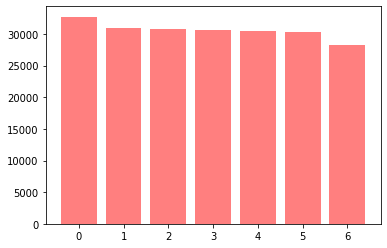

In [26]:
# Bar graph of total crime per day of week
day = [0,1,2,3,4,5,6]
plt.bar(day, day_crime, color='r', alpha=0.5, align="center")